In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from small_script.myFunctions import *
import feather
import Bio.PDB as bio
d3_to_index = bio.Polypeptide.d3_to_index  # we may want to adjust this in the future.
three_to_one = bio.Polypeptide.three_to_one
plt.rcParams['figure.figsize'] = [16.18033, 10]

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data = feather.read_dataframe("/Users/weilu/Research/optimization/fragment/feather_frag_data_jan14.feather")

In [5]:
data.head()

,pdb,i,seq,dis1,dis2,dis3,dis4,dis5,dis6,dis7,...,dis13,dis14,dis15,dis16,dis17,dis18,dis19,dis20,dis21,DisType
0,1igqB00,0,DKLKKAIVQ,9.545797,12.242739,11.389445,14.435853,15.702080,18.185148,9.427593,...,9.385722,11.658462,14.435720,9.566237,12.596333,15.433746,9.934756,12.622395,9.527388,dis_ca_ca
1,1igqB00,0,DKLKKAIVQ,10.203734,13.362099,10.874768,15.082260,16.066488,17.967852,10.522633,...,10.002345,12.148303,14.398872,10.041182,13.079222,15.527972,10.495568,12.849380,9.826223,dis_ca_cb
2,1igqB00,0,DKLKKAIVQ,9.914081,12.285064,11.122988,13.902566,15.046198,17.301693,10.278061,...,8.263468,10.266681,13.093221,10.358747,13.604508,16.222908,10.629156,13.001775,9.682165,dis_cb_ca
3,1igqB00,0,DKLKKAIVQ,10.556716,13.372369,10.652945,14.474377,15.494028,16.996122,11.246230,...,8.984903,10.732664,13.098623,10.637720,14.192881,16.225273,11.296279,13.163033,10.095731,dis_cb_cb
4,1igqB00,1,KLKKAIVQV,9.427593,9.508488,13.046163,14.956468,17.811722,21.096529,5.881323,...,12.596333,15.433746,18.900240,9.934756,12.622395,16.016058,9.527388,12.877730,9.505291,dis_ca_ca


In [15]:
data.iloc[:,3:24].max().max()

30.636227

In [16]:
data.iloc[:,3:24].min().min()

1.2272211000000002

In [101]:
np.arange(0,31,4)

array([ 0,  4,  8, 12, 16, 20, 24, 28])

In [57]:
pd.interval_range(start=0, end=31, freq=5).mid.astype(int)

Int64Index([2, 7, 12, 17, 22, 27], dtype='int64')

In [102]:
labels = pd.interval_range(start=0, end=31, freq=4).mid.astype(int)
for i in range(1,22):
    data[f"d{i}"] = pd.cut(data[f"dis{i}"], bins=np.arange(0,31,4), labels=labels)

In [105]:
data["dd"] = d["d1"].astype(str)
for i in range(2,22):
    data["dd"] += d[f"d{i}"].astype(str)
d = data.query("DisType == 'dis_ca_ca'").reset_index(drop=True)

In [ ]:
data.to_feather("/Users/weilu/Research/optimization/fragment/feather_frag_data_bin4_jan18.feather")

In [106]:
count_data = d["dd"].value_counts()

In [108]:
# number of unique fold. 78,333
len(count_data)

78333

In [109]:
# number of total frag, 475,358
count_data.reset_index()["dd"].sum()

475358

In [110]:
count_data.reset_index().query("dd > 1").shape

(32552, 2)

In [111]:
count_data.reset_index().query("dd > 2").shape

(20421, 2)

In [113]:
count_data.reset_index().query("dd > 5").shape

(9476, 2)

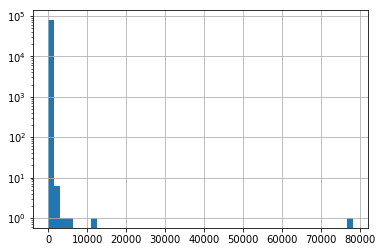

In [114]:
count_data.reset_index()["dd"].hist(bins=50, log=True)

In [240]:
data["dis6"][data["dis6"] >= 30] = 29.99  # cap the large dis to 30
labels = pd.interval_range(start=0, end=30, freq=2).mid.astype(int)
for i in range(1,22):
    data[f"d{i}"] = pd.cut(data[f"dis{i}"], bins=np.arange(0,32,2), labels=labels)

In [215]:
labels

Int64Index([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], dtype='int64')

In [239]:
np.arange(0,32,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])

In [263]:
data["dd"] = data["d1"].astype(int).astype(str)
for i in range(2,22):
    
    data["dd"] += "," + data[f"d{i}"].astype(int).astype(str)
d = data.query("DisType == 'dis_ca_ca'").reset_index(drop=True)

In [243]:
data.to_feather("/Users/weilu/Research/optimization/fragment/feather_frag_data_bin2_jan18.feather")

In [195]:
data = feather.read_dataframe("/Users/weilu/Research/optimization/fragment/feather_frag_data_bin2_jan18.feather")
# data = data.drop(columns="dd")
# d = data.query("DisType == 'dis_ca_ca'").reset_index(drop=True)

In [264]:
d.head()

,pdb,i,seq,dis1,dis2,dis3,dis4,dis5,dis6,dis7,...,d13,d14,d15,d16,d17,d18,d19,d20,d21,dd
0,1igqB00,0,DKLKKAIVQ,9.545797,12.242739,11.389445,14.435853,15.702080,18.185148,9.427593,...,9,11,15,9,13,15,9,13,9,"9,13,11,15,15,19,9,9,13,15,17,5,9,11,15,9,13,1..."
1,1igqB00,1,KLKKAIVQV,9.427593,9.508488,13.046163,14.956468,17.811722,21.096529,5.881323,...,13,15,19,9,13,17,9,13,9,"9,9,13,15,17,21,5,9,11,15,17,9,13,15,19,9,13,1..."
2,1igqB00,2,LKKAIVQVE,5.881323,9.385722,11.658462,14.435720,17.857430,21.547594,9.566237,...,13,17,19,9,13,17,9,13,11,"5,9,11,15,17,21,9,13,15,19,23,9,13,17,19,9,13,..."
3,1igqB00,3,KKAIVQVEH,9.566237,12.596333,15.433746,18.900240,22.492163,25.003511,9.934756,...,13,17,19,9,13,15,11,13,11,"9,13,15,19,23,25,9,13,17,19,21,9,13,17,19,9,13..."
4,1igqB00,4,KAIVQVEHD,9.934756,12.622395,16.016058,19.465660,21.763054,25.281502,9.527388,...,13,15,19,11,13,17,11,13,11,"9,13,17,19,21,25,9,13,17,19,23,9,13,15,19,11,1..."


In [265]:
count_data = d["dd"].value_counts()

In [266]:
# number of unique fold. 853,589
len(count_data)

853589

In [267]:
# number of total frag, 1,901,430  
count_data.reset_index()["dd"].sum()

1901430

In [268]:
count_data.reset_index().query("dd > 1").shape

(156257, 2)

In [269]:
count_data.reset_index().query("dd > 2").shape

(78057, 2)

In [270]:
count_data.reset_index().query("dd > 5").shape

(29117, 2)

In [271]:
count_data.reset_index().query("dd > 10").shape

(13346, 2)

In [272]:
count_data_dd_10 = count_data.reset_index().query("dd > 10").rename(columns={"index":"dd", "dd":"count"})
count_data_dd_10 = count_data_dd_10.reset_index().rename(columns={"index":"category"})

In [273]:
save_data = d.merge(count_data_dd_10, how='left', left_index=True, on="dd")

In [275]:
save_data.reset_index(drop=True).to_csv("/Users/weilu/Research/optimization/fragment/clustered_bin2_jan18.csv")

## all ca, cb pair

In [80]:
count_data.reset_index().query("dd > 1").shape

(156257, 2)

In [81]:
count_data.reset_index().query("dd > 2").shape

(78057, 2)

In [83]:
count_data.reset_index().query("dd > 3").shape

(50756, 2)

In [89]:
count_data.reset_index().query("dd > 1")["dd"].sum()

1204098

In [85]:
# number of unique fold, filter less frequent, 29,117
count_data.reset_index().query("dd > 5").shape

(29117, 2)

In [87]:
count_data.reset_index().query("dd > 5")["dd"].sum()

871226

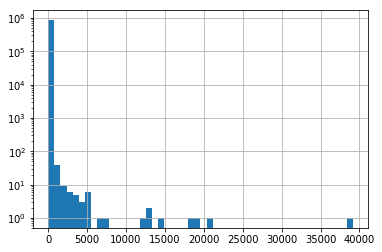

In [94]:
count_data.reset_index()["dd"].hist(bins=50, log=True)

In [38]:
pd.cut(data.head()["dis1"], bins=np.arange(0,31,2)).cat.

0     (8, 10]
1    (10, 12]
2     (8, 10]
3    (10, 12]
4     (8, 10]
Name: dis1, dtype: category
Categories (15, interval[int64]): [(0, 2] < (2, 4] < (4, 6] < (6, 8] ... (22, 24] < (24, 26] < (26, 28] < (28, 30]]

In [4]:
data = pd.read_csv("/Users/weilu/Research/optimization/fragment/data_jan14.csv")

In [36]:
data["seqDis"] = data["j"]+3
data.to_feather("/Users/weilu/Research/optimization/fragment/feather_data_jan14_2.feather")

In [14]:
data = feather.read_dataframe("/Users/weilu/Research/optimization/fragment/feather_data_jan14_2.feather")

In [19]:
three_to_one("ASP")

'D'

In [39]:
test = data.sample(int(1e6))

In [35]:
data.head(20)

,pdb,i,j,res1,res2,dis_ca_ca,dis_ca_cb,dis_cb_ca,dis_cb_cb,seqDis
0,1igqB00,0,0,ASP,LYS,9.545797,10.203734,9.914081,10.556716,3
1,1igqB00,0,1,ASP,LYS,12.242739,13.362099,12.285064,13.372369,4
2,1igqB00,0,2,ASP,ALA,11.389445,10.874768,11.122988,10.652946,5
3,1igqB00,0,3,ASP,ILE,14.435853,15.082260,13.902566,14.474377,6
4,1igqB00,0,4,ASP,VAL,15.702080,16.066488,15.046198,15.494028,7
5,1igqB00,0,5,ASP,GLN,18.185148,17.967852,17.301693,16.996122,8
6,1igqB00,0,6,ASP,VAL,21.298042,21.665291,20.407768,20.859966,9
7,1igqB00,1,0,LYS,LYS,9.427593,10.522633,10.278061,11.246230,3
8,1igqB00,1,1,LYS,ALA,9.508488,9.150386,10.755317,10.501932,4
9,1igqB00,1,2,LYS,ILE,13.046163,13.734128,14.317800,14.933916,5


# distribution of ca ca distance, grouped by sequence distance.

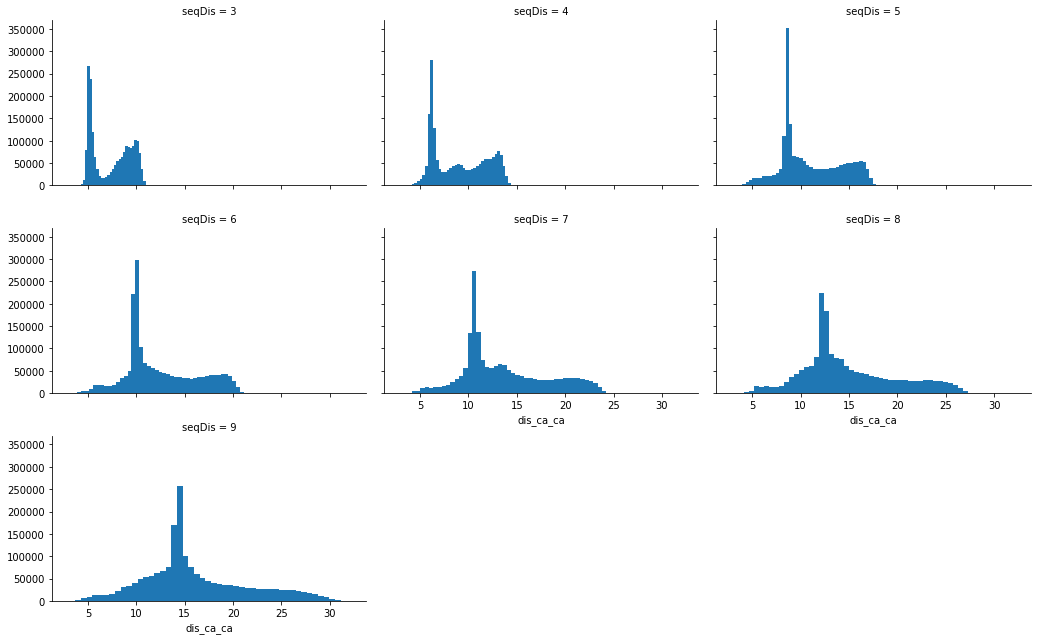

In [45]:
g = sns.FacetGrid(data, col="seqDis", col_wrap=3, height=3, aspect=1.618033)
g = g.map(plt.hist, "dis_ca_ca", bins=50)

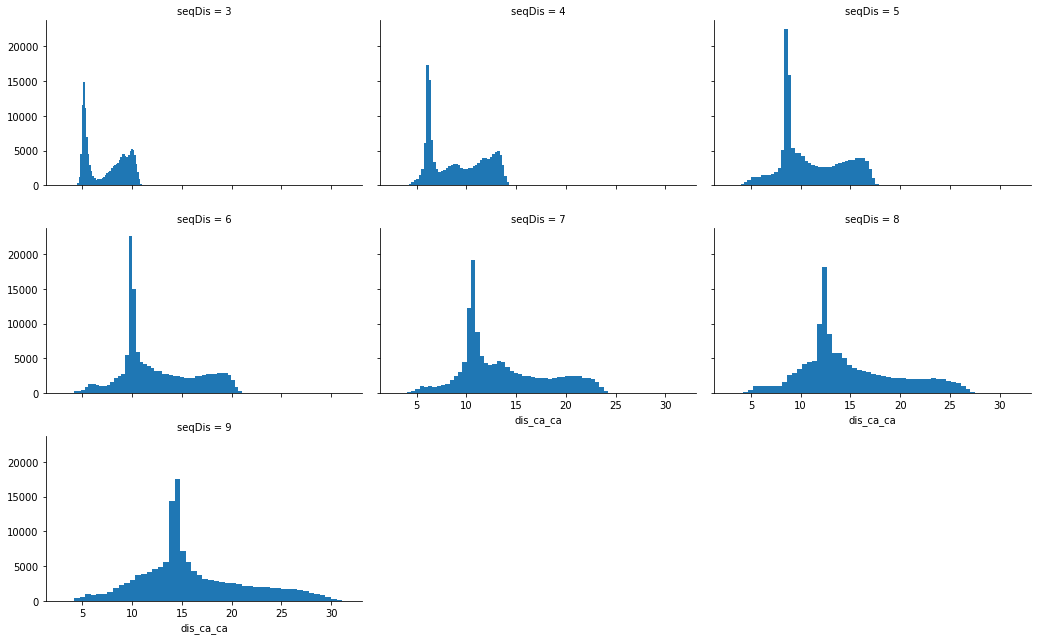

In [44]:
g = sns.FacetGrid(test, col="seqDis", col_wrap=3, height=3, aspect=1.618033)
g = g.map(plt.hist, "dis_ca_ca", bins=50)

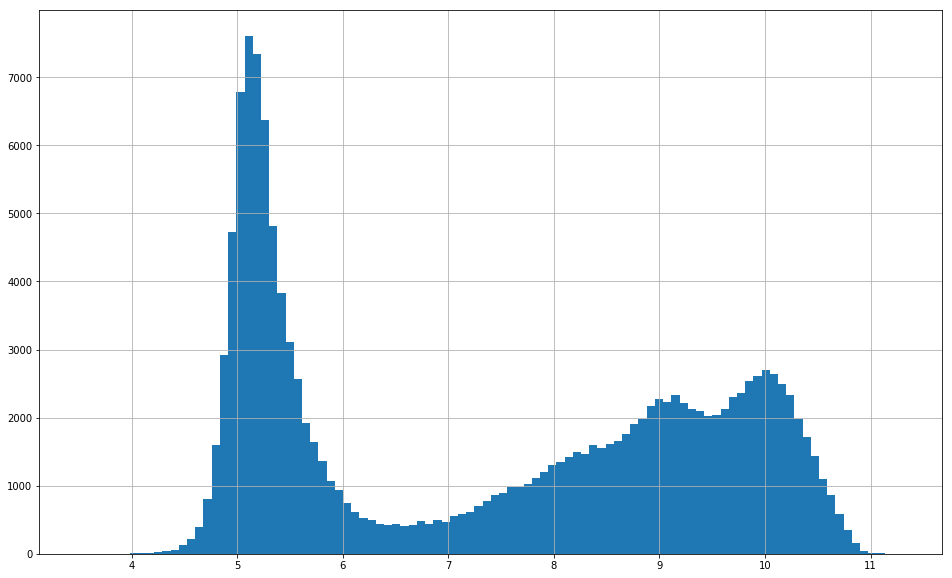

In [47]:
plt.rcParams['figure.figsize'] = [16.18033, 10]
test.query("j == 0")["dis_ca_ca"].hist(bins=100)